# Computational Intelligence - Predicting Tooth Disease.
# Group 4: Wenhan Yang, Fengrui Zhan, Umair Abbas, Miguel Angel








# Objective:
Try to define probability for a patient to have a disease on their tooth supporting tissues from simple data that can be acquired remotely. It is to define the risk factors to develop such diseases.

# Description of Features:

# Labels:
Diagnosis	'Gingivitis''Periodontitis''Healthy'

# Data Visualization
We use the histogram to visualize the data,which can show us the distribution of each feature for each type of Diagnosis.
And we delete "Pregnant",because almost all the values are NO and NULL(for those men or too old and too young women),we think this feature is not representative.You can modify the variable "x_index" to see all features' histogram.

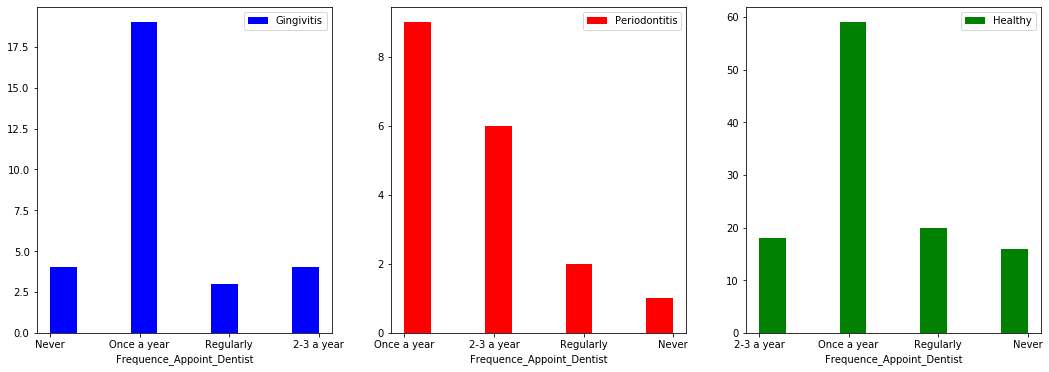

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.gaussian_process import GaussianProcessClassifier
#from imblearn.over_sampling import SMOTE
#from sklearn.ensemble import RandomForestClassifier


def data_visualization():
    data1 = pd.read_excel("./data1.xlsx")
    pd.set_option('display.max_columns', 20)
    del data1['Pregnant']
    data1 = data1.dropna(axis=0, how='any')   # delete all the rows that have at least one NULL value 
    target=data1['Diagnosis']
    feature_names=['Sex','Age','BMI','Smoking','Pathologies','Food_Sugar','Fat_Salty','Soda','Alcohol','Frequence_Appoint_Dentist'
                 ,'Hygiene_Dental','Gingivorrhagia','Stress_Daily','PI']
    target_names=['Gingivitis','Periodontitis','Healthy']

    x_index = 9  # Modify this variable to see all features' histogram (x: 0-13)
    colors = ['blue', 'red', 'green']
    figsize = 18,6
    figure, ax = plt.subplots(figsize=figsize)
    for label, color in zip(range(len(target_names)), colors):
        plt.subplot(1,len(target_names),label+1)
        plt.hist(data1[feature_names[x_index]][target==target_names[label]], 
             label=target_names[label],
             color=color)
        plt.xlabel(feature_names[x_index])
        plt.legend(loc='upper right')      
    plt.show()
data_visualization()

# Outlier Detection
 We can know there are only two features (age and BMI) are numerical, and the rest are discrete. 
 And we try to use box plot to find if there are some outliers in the values of these two numerical features.

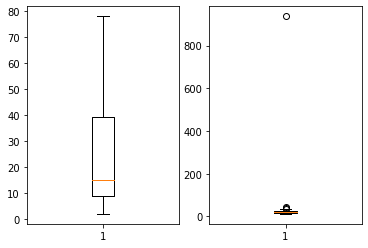

In [3]:
def detect_outliers():
    data1 = pd.read_excel("./data1.xlsx")
    for i in range(1,3):
        plt.subplot(1,2,i)
        plt.boxplot(data1.iloc[:,i+1])
    plt.show()
detect_outliers()

# Preprocessing of Data
First,we delete all rows, which Diagnosis value for this row is NULL. Second, we convert string class to numerical class. Third,we delete rows with outlier data. Last,we implement data normalization (keep each value between 0 and 1).

In [5]:
def data_preprocess():
    # Import dataset to panda data frame
    data1 = pd.read_excel("./data1.xlsx")
    pd.set_option('display.max_columns', 20)
    data1 = data1.dropna(axis=0, subset=['Diagnosis'])
    
    # Convert string class to numerical class
    data1['Sex'] = data1['Sex'].astype('category')
    data1['Sex'] = data1['Sex'].cat.codes

    data1['Smoking'] = data1['Smoking'].astype('category')
    data1['Smoking'] = data1['Smoking'].cat.codes
    
    data1['Pathologies'] = data1['Pathologies'].astype('category')
    data1['Pathologies'] = data1['Pathologies'].cat.codes

    data1['Pregnant'] = data1['Pregnant'].astype('category')
    data1['Pregnant'] = data1['Pregnant'].cat.codes

    data1['Food_Sugar'] = data1['Food_Sugar'].astype('category')
    data1['Food_Sugar'] = data1['Food_Sugar'].cat.codes

    data1['Fat_Salty'] = data1['Fat_Salty'].astype('category')
    data1['Fat_Salty'] = data1['Fat_Salty'].cat.codes

    data1['Soda'] = data1['Soda'].astype('category')
    data1['Soda'] = data1['Soda'].cat.codes

    data1['Alcohol'] = data1['Alcohol'].astype('category')
    data1['Alcohol'] = data1['Alcohol'].cat.codes
    
    data1['Frequence_Appoint_Dentist'] = data1['Frequence_Appoint_Dentist'].astype('category')
    data1['Frequence_Appoint_Dentist'] = data1['Frequence_Appoint_Dentist'].cat.codes

    data1['Gingivorrhagia'] = data1['Gingivorrhagia'].astype('category')
    data1['Gingivorrhagia'] = data1['Gingivorrhagia'].cat.codes

    data1['Diagnosis'] = data1['Diagnosis'].astype('category')
    data1['Diagnosis'] = data1['Diagnosis'].cat.codes

    # print(data1.iloc[0:30,:])
    # data1.info()
    
    #Deletes rows with outlier data
    data1=data1.drop([23])   
    
    # data normalization
    data1.iloc[:, 1:15] = (data1.iloc[:, 1:15] - data1.iloc[:, 1:15].min()) / (
            data1.iloc[:, 1:15].max() - data1.iloc[:, 1:15].min())  
    # print(data1)
    return data1
data_preprocess()

,ID,Sex,Age,BMI,Smoking,Pathologies,Pregnant,Food_Sugar,Fat_Salty,Soda,Alcohol,Frequence_Appoint_Dentist,Hygiene_Dental,Gingivorrhagia,Stress_Daily,PI,Diagnosis
0,1,1.0,0.710526,0.501731,0.5,0.5,0.5,0.00,1.00,0.00,0.75,0.50,0.333333,0.000000,0.444444,1.0,0
1,2,1.0,0.776316,0.312346,0.5,1.0,0.5,1.00,1.00,1.00,1.00,0.75,0.500000,0.000000,0.444444,1.0,2
2,3,1.0,0.078947,0.099392,0.0,1.0,0.5,0.75,1.00,1.00,0.00,0.25,0.333333,0.000000,0.333333,1.0,1
3,4,0.0,0.263158,0.310813,0.0,0.5,0.0,0.75,0.00,0.75,0.75,0.75,0.500000,0.000000,0.111111,0.0,1
4,5,1.0,0.276316,0.241649,0.0,0.5,0.5,0.25,0.75,0.00,1.00,1.00,0.333333,0.000000,0.444444,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,222,1.0,1.000000,0.574678,0.5,0.5,0.5,1.00,1.00,0.25,1.00,0.75,0.666667,0.333333,0.555556,3.0,2
213,230,0.0,0.210526,0.336159,0.0,1.0,0.0,1.00,1.00,1.00,1.00,0.75,0.500000,0.000000,0.444444,0.0,1
215,232,0.0,0.171053,0.443227,0.0,0.5,0.0,1.00,1.00,1.00,0.00,0.50,0.333333,0.000000,0.222222,1.0,1
216,233,1.0,0.131579,0.115890,0.0,0.5,0.5,0.75,0.75,0.50,0.00,0.75,0.333333,0.000000,0.666667,0.0,1


# Data Correlation
Then we calculate the correlation coefficients between the features and show them in a heat map. 

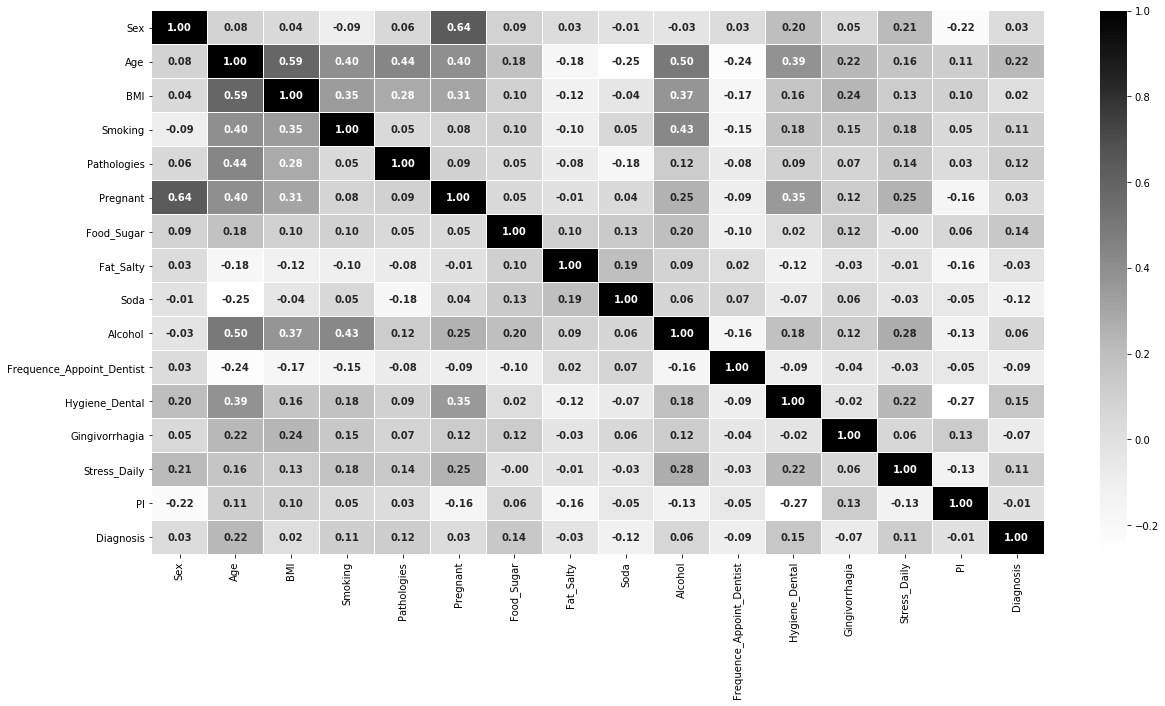

In [4]:
def cal_correlation():
    # Calculate the correlation  
    data1=data_preprocess()
    del data1['ID']
    corr = data1.corr() 
    plt.figure(figsize = (20,10))
    sns.heatmap(corr,cmap=plt.cm.Greys, linewidths=0.05,annot=True,fmt=".2f",annot_kws={'size':10,'weight':'bold'})
    plt.show()
cal_correlation()

In [7]:
def data_select(i):
    data = data_preprocess()
    if i == 0:
        data1 = data.iloc[:, 1:17]
        print('All features')
    if i == 1:
        data1 = data.loc[:, ['Age', 'Smoking', 'Pathologies', 'Food_Sugar', 'Soda', 'Frequence_Appoint_Dentist', 'Stress_Daily', 'Hygiene_Dental', 'Diagnosis']]   #use the correlated features
        print('Correlated features')
    if i == 2:
        data1 = pca_process()  # using data reduced dimension from PCA
        print('PCA process')
    if i == 3:
        data1 = over_sampling()
        print('Data balanced')
    data1 = data1.dropna(axis=0)
    return data1

In [8]:
def pca_process():
    # PCA
    data1 = data_select(1) #we only use correlated features
    number_components = 6
    pca = PCA(n_components=number_components)
    x_pca = data1.loc[:, data1.columns != 'Diagnosis']
    y_pca = data1.loc[:, ['Diagnosis']]
    # X_train, X_test, y_train, y_test = train_test_split(x_data, y_target, random_state=0, stratify=y_target)
    pca.fit(x_pca)
    X_train_pca = pd.DataFrame(pca.transform(x_pca))
    data2 = pd.DataFrame(np.hstack([X_train_pca, y_pca]))
    data2 = data2.rename(columns={number_components: 'Diagnosis'})
    return data2

In [15]:
def over_sampling():
    data1 = data_select(1) #we only use correlated features
    smote = SMOTE('minority')
    x_smote, y_smote =smote.fit_sample(data1.loc[:, data1.columns != 'Diagnosis'], data1.loc[:, ['Diagnosis']])
    data2 = pd.DataFrame(np.hstack([x_smote, y_smote]))
    data2 = data2.rename(columns={8: 'Diagnosis'})
    return data2

Correlated features


,0,1,2,3,4,5,6,7,Diagnosis
0,0.710526,0.500000,0.500000,0.000000,0.000000,0.500000,0.444444,0.333333,0.0
1,0.776316,0.500000,1.000000,1.000000,1.000000,0.750000,0.444444,0.500000,2.0
2,0.078947,0.000000,1.000000,0.750000,1.000000,0.250000,0.333333,0.333333,1.0
3,0.263158,0.000000,0.500000,0.750000,0.750000,0.750000,0.111111,0.500000,1.0
4,0.276316,0.000000,0.500000,0.250000,0.000000,1.000000,0.444444,0.333333,1.0
...,...,...,...,...,...,...,...,...,...
266,0.622605,0.396313,0.603687,0.801843,0.198157,0.750000,0.291347,0.666667,2.0
267,0.516669,1.000000,0.519060,0.750000,0.759530,0.519060,0.884653,0.346040,2.0
268,0.764996,0.313065,1.000000,1.000000,1.000000,0.436935,0.347850,0.646399,2.0
269,0.295449,0.161613,0.661613,1.000000,1.000000,0.750000,0.218853,0.274408,2.0


# Decision Tree

In [17]:
def decision_tree():
    # Decision Tree
    for i in [0, 1, 2 ,3]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        for depth in [1, 2, 3, 4, 5]:
            print('Depth of ', depth)
            Dt = DecisionTreeClassifier(max_depth=depth)
            #split validation
            X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.12, random_state=53)
            Dt.fit(X_train, Y_train)
            train_score = Dt.score(X_train, Y_train)
            test_score = Dt.score(X_test, Y_test)
            print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
            #K-fold validation
            kfold = model_selection.KFold(n_splits=10)
            results_kfold = model_selection.cross_val_score(Dt, x_data, np.ravel(y_data, order='C'), cv=kfold)
            print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
            #leave one out validatoin
            loocv = LeaveOneOut()
            results_loocv = model_selection.cross_val_score(Dt, x_data, np.ravel(y_data, order='C'), cv=loocv)
            print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
decision_tree()

All features
Depth of  1
Train Acc: 0.787, Test Acc: 0.762
Accuracy: 77.88%
Accuracy: 77.78%
Depth of  2
Train Acc: 0.813, Test Acc: 0.714
Accuracy: 73.20%
Accuracy: 73.10%
Depth of  3
Train Acc: 0.840, Test Acc: 0.714
Accuracy: 70.26%
Accuracy: 68.42%
Depth of  4
Train Acc: 0.860, Test Acc: 0.667
Accuracy: 66.76%
Accuracy: 64.33%
Depth of  5
Train Acc: 0.880, Test Acc: 0.714
Accuracy: 66.76%
Accuracy: 71.35%
Correlated features
Depth of  1
Train Acc: 0.787, Test Acc: 0.762
Accuracy: 77.88%
Accuracy: 77.78%
Depth of  2
Train Acc: 0.800, Test Acc: 0.714
Accuracy: 74.38%
Accuracy: 73.10%
Depth of  3
Train Acc: 0.827, Test Acc: 0.714
Accuracy: 76.14%
Accuracy: 74.27%
Depth of  4
Train Acc: 0.853, Test Acc: 0.714
Accuracy: 73.79%
Accuracy: 75.44%
Depth of  5
Train Acc: 0.887, Test Acc: 0.714
Accuracy: 74.38%
Accuracy: 74.85%
Correlated features
PCA process
Depth of  1
Train Acc: 0.733, Test Acc: 0.619
Accuracy: 67.88%
Accuracy: 69.59%
Depth of  2
Train Acc: 0.787, Test Acc: 0.762
Accuracy:

# Support Vector Machine

In [16]:
def support_vector():
    for i in [0, 1, 2, 3]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        for function in ['linear', 'rbf', 'sigmoid']:
            print('Function is', function)
            sv = SVC(kernel=function)
            #split validation
            X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
            sv.fit(X_train, np.ravel(Y_train, order='C'))
            train_score = sv.score(X_train, Y_train)
            test_score = sv.score(X_test, Y_test)
            print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
            # K-fold validation
            kfold = model_selection.KFold(n_splits=10)
            results_kfold = model_selection.cross_val_score(sv, x_data, np.ravel(y_data, order='C'), cv=kfold)
            print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
            # leave one out validatoin
            loocv = LeaveOneOut()
            results_loocv = model_selection.cross_val_score(sv, x_data, np.ravel(y_data, order='C'), cv=loocv)
            print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
support_vector()

All features
Function is linear
Train Acc: 0.828, Test Acc: 0.744
Accuracy: 71.37%
Accuracy: 72.51%
Function is rbf
Train Acc: 0.828, Test Acc: 0.767
Accuracy: 70.82%
Accuracy: 70.76%
Function is sigmoid
Train Acc: 0.703, Test Acc: 0.698
Accuracy: 67.91%
Accuracy: 69.01%
Correlated features
Function is linear
Train Acc: 0.805, Test Acc: 0.767
Accuracy: 72.58%
Accuracy: 76.02%
Function is rbf
Train Acc: 0.828, Test Acc: 0.767
Accuracy: 74.31%
Accuracy: 74.85%
Function is sigmoid
Train Acc: 0.688, Test Acc: 0.674
Accuracy: 66.67%
Accuracy: 67.25%
Correlated features
PCA process
Function is linear
Train Acc: 0.766, Test Acc: 0.721
Accuracy: 71.99%
Accuracy: 72.51%
Function is rbf
Train Acc: 0.836, Test Acc: 0.744
Accuracy: 73.14%
Accuracy: 71.93%
Function is sigmoid
Train Acc: 0.750, Test Acc: 0.674
Accuracy: 74.97%
Accuracy: 74.85%
Correlated features
Data balanced
Function is linear
Train Acc: 0.842, Test Acc: 0.868
Accuracy: 84.96%
Accuracy: 85.24%
Function is rbf
Train Acc: 0.872, Tes

# GPC(Guassian Process Classifier)

In [9]:
from sklearn.gaussian_process.kernels import RBF

def GP_Classifier():
    for i in [0, 1, 2]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        gpc = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
        # split validation
        X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
        gpc.fit(X_train, np.ravel(Y_train, order='C'))
        train_score = gpc.score(X_train, Y_train)
        test_score = gpc.score(X_test, Y_test)
        print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
        # K-fold validation
        kfold = model_selection.KFold(n_splits=10)
        results_kfold = model_selection.cross_val_score(gpc, x_data, np.ravel(y_data, order='C'), cv=kfold)
        print("Accuracy K-Fold: %.2f%%" % (results_kfold.mean() * 100.0))
        # leave one out validatoin
        loocv = LeaveOneOut()
        results_loocv = model_selection.cross_val_score(gpc, x_data, np.ravel(y_data, order='C'), cv=loocv)
        print("Accuracy LOOCV: %.2f%%" % (results_loocv.mean() * 100.0))
GP_Classifier()

All features
Train Acc: 0.836, Test Acc: 0.767
Accuracy K-Fold: 71.41%
Accuracy LOOCV: 70.76%
Correlated features
Train Acc: 0.773, Test Acc: 0.744
Accuracy K-Fold: 73.14%
Accuracy LOOCV: 73.10%
Correlated features
PCA process
Train Acc: 0.766, Test Acc: 0.744
Accuracy K-Fold: 73.73%
Accuracy LOOCV: 73.10%


# Using Over-Sampling technique to make the dataset balanced
The dataset is imbalanced, as two of the classes namely Gingivitis(33 occurences) and Periodontitis(17 occurences) are under represented in the dataset, we use an over sampling method to balance the dataset and then redo the classification with Guassian Process Classifier.

# Running GCP on Balanced Dataset

In [10]:
from sklearn.gaussian_process.kernels import RBF
def GP_Classifier_with_over_sampling():
    print ("**GP Classifier with over sampling**")
    for i in [0, 1, 2]:
       
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        gpc = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0),
                                   optimizer=None)
        # split validation
        X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
        smote = SMOTE('minority')
        x_sm, y_sm =smote.fit_sample(X_train, Y_train)
        gpc.fit(x_sm, np.ravel(y_sm, order='C'))
        train_score = gpc.score(x_sm, y_sm)
        test_score = gpc.score(X_test, Y_test)
        print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
        # K-fold validation
        x_sm, y_sm =smote.fit_sample(x_data, y_data)
        kfold = model_selection.KFold(n_splits=10)
        results_kfold = model_selection.cross_val_score(gpc, x_sm, np.ravel(y_sm, order='C'), cv=kfold)
        print("Accuracy K-Fold: %.2f%%" % (results_kfold.mean() * 100.0))
        # leave one out validatoin
        x_sm, y_sm =smote.fit_sample(x_data, y_data)
        loocv = LeaveOneOut()
        results_loocv = model_selection.cross_val_score(gpc, x_sm, np.ravel(y_sm, order='C'), cv=loocv)
        print("Accuracy LOOCV: %.2f%%" % (results_loocv.mean() * 100.0))
GP_Classifier_with_over_sampling()

**GP Classifier with over sampling**
All features
Train Acc: 0.876, Test Acc: 0.698
Accuracy K-Fold: 82.72%
Accuracy LOOCV: 83.76%
Correlated features
Train Acc: 0.861, Test Acc: 0.698
Accuracy K-Fold: 82.74%
Accuracy LOOCV: 84.50%
Correlated features
PCA process
Train Acc: 0.847, Test Acc: 0.674
Accuracy K-Fold: 81.27%
Accuracy LOOCV: 81.92%


# Performance of GPC after Over-sampling
It can be seen that by balancing the dataset, accuracy of the model increased to 84.13% Percent.

# Performance of Random Forest
Random Forest gave an acuuracy of 84.37% proving to be best of used algorithms.

In [24]:
def random_forest():
    for i in [0, 1, 2, 3]:
        data = data_select(i)
        y_data = data.loc[:, ['Diagnosis']]
        x_data = data.loc[:, data.columns != 'Diagnosis']
        for estimator in [10, 20, 30, 40, 50]:
            print('The number of estimator is: ', estimator)
            RFC = RandomForestClassifier(n_estimators=estimator, random_state=53) #random_state = 100 = 90% accuracy
            #split validation
            X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=53)
            RFC.fit(X_train, np.ravel(Y_train, order='C'))
            train_score = RFC.score(X_train, Y_train)
            test_score = RFC.score(X_test, Y_test)
            print('Train Acc: %.3f, Test Acc: %.3f' % (train_score, test_score))
            # K-fold validation
            kfold = model_selection.KFold(n_splits=10)
            results_kfold = model_selection.cross_val_score(RFC, x_data, np.ravel(y_data, order='C'), cv=kfold)
            print("Accuracy: %.2f%%" % (results_kfold.mean() * 100.0))
            # leave one out validatoin
            loocv = LeaveOneOut()
            results_loocv = model_selection.cross_val_score(RFC, x_data, np.ravel(y_data, order='C'), cv=loocv)
            print("Accuracy: %.2f%%" % (results_loocv.mean() * 100.0))
random_forest()

All features
The number of estimator is:  10
Train Acc: 0.992, Test Acc: 0.744
Accuracy: 74.28%
Accuracy: 73.68%
The number of estimator is:  20
Train Acc: 0.992, Test Acc: 0.744
Accuracy: 75.49%
Accuracy: 74.85%
The number of estimator is:  30
Train Acc: 0.992, Test Acc: 0.744
Accuracy: 75.49%
Accuracy: 74.85%
The number of estimator is:  40
Train Acc: 0.992, Test Acc: 0.744
Accuracy: 74.90%
Accuracy: 74.85%
The number of estimator is:  50
Train Acc: 1.000, Test Acc: 0.767
Accuracy: 74.90%
Accuracy: 74.27%
Correlated features
The number of estimator is:  10
Train Acc: 0.992, Test Acc: 0.744
Accuracy: 70.85%
Accuracy: 70.76%
The number of estimator is:  20
Train Acc: 1.000, Test Acc: 0.767
Accuracy: 69.67%
Accuracy: 72.51%
The number of estimator is:  30
Train Acc: 1.000, Test Acc: 0.767
Accuracy: 71.41%
Accuracy: 72.51%
The number of estimator is:  40
Train Acc: 0.992, Test Acc: 0.744
Accuracy: 72.58%
Accuracy: 73.10%
The number of estimator is:  50
Train Acc: 1.000, Test Acc: 0.744
A

# Conclusion and Comparison of the Algorithms